# HOMEWORK 8

In this homework you are going to implement your first machine learning algorithm to automatically binarize document images. The goal of document binarization is to seprate the characters (letters) from everything else. This is the crucial part for automatic document understanding and information extraction from the . In order to do so, you will use the Otsu thresholding algorithm.

At the end of this notebook, there are a couple of questions for you to answer.

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the document image we will be working on in this homework.

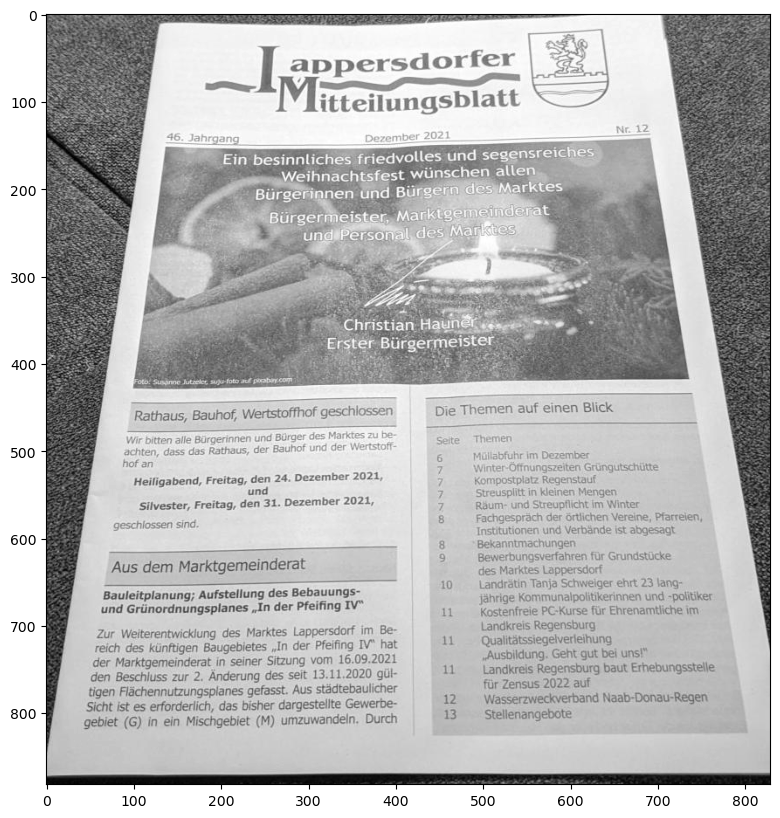

In [3]:
img = cv2.imread('../data/document.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

First, let's have a look at the histogram.

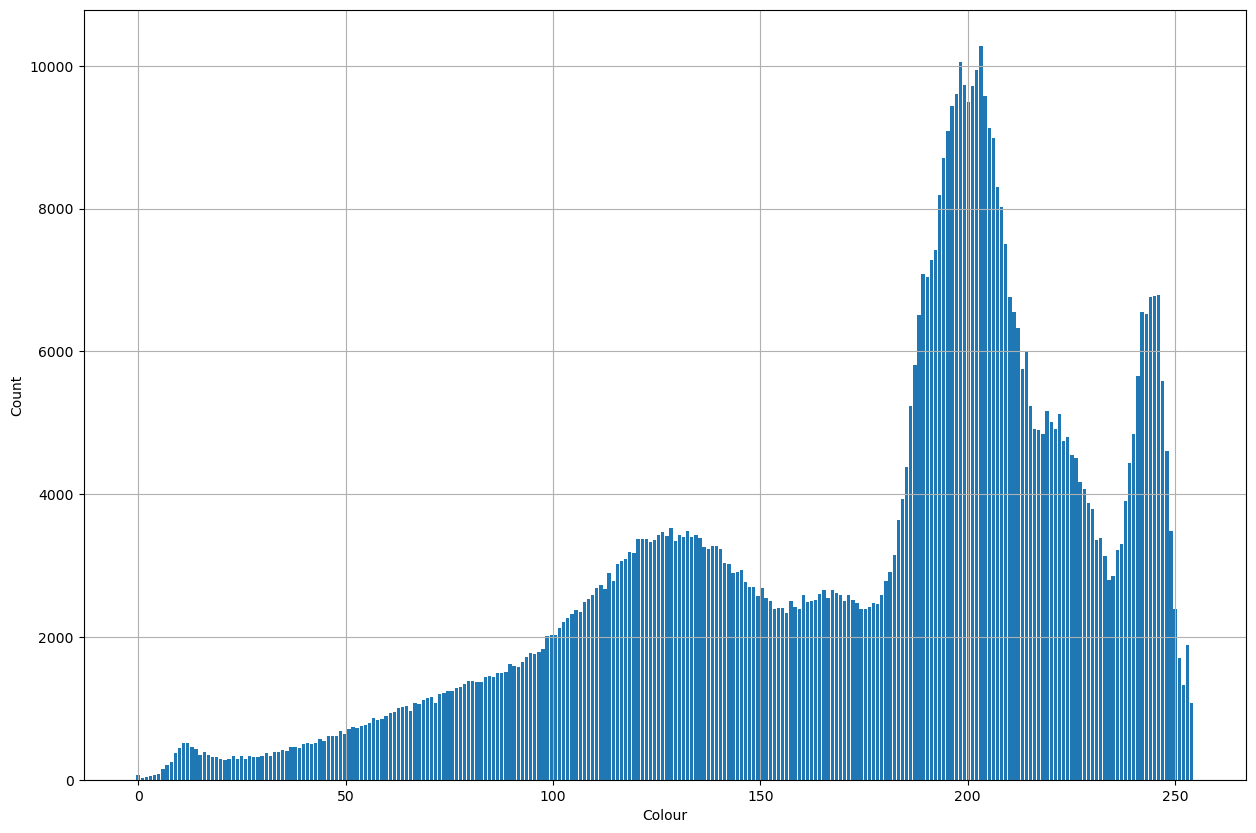

In [4]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)

### Otsu Thresholding

Let's now implement the Otsu thresholding algorithm. Remember that the algorithm consists of an optimization process that finds the thresholds that minimizes the intra-class variance or, equivalently, maximizes the inter-class variance.

In this homework, you are going to demonstrate the working principle of the Otsu algorithm. Therefore, you won't have to worry about an efficient implementation, we are going to use the brute force approach here.

In [5]:
# Get image dimensions
rows, cols = img.shape
# Compute the total amount of image pixels
num_pixels = rows*cols # len(img.flatten())

# Initializations
best_wcv = np.inf  # Best within-class variance (wcv)
opt_th = None      # Threshold corresponding to the best wcv

# Brute force search using all possible thresholds (levels of gray)
for th in range(0, 256):
    tr = img<=th
    # Extract the image pixels corresponding to the background
    foreground = img[tr]
    # Extract the image pixels corresponding to the background
    background = img[np.logical_not(tr)]
    
    # If foreground or background are empty, continue
    if len(foreground) == 0 or len(background) == 0:
        continue
    
    # Compute class-weights (omega parameters) for foreground and background
    omega_f = np.mean(foreground)
    omega_b = np.mean(background)
    
    # Compute pixel variance for foreground and background
    # Hint: Check out the var function from numpy ;-)
    # https://numpy.org/doc/stable/reference/generated/numpy.var.html
    sigma2_f = np.var(foreground)
    sigma2_b = np.var(background)
    
    # Compute the within-class variance
    wcv = omega_f*sigma2_f + omega_b*sigma2_b
    
    # Perform the optimization
    if wcv < best_wcv:
        best_wcv = wcv
        opt_th = th
        
# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold', opt_th)

Optimal threshold 159


Finally, let's compare the original image and its thresholded representation.

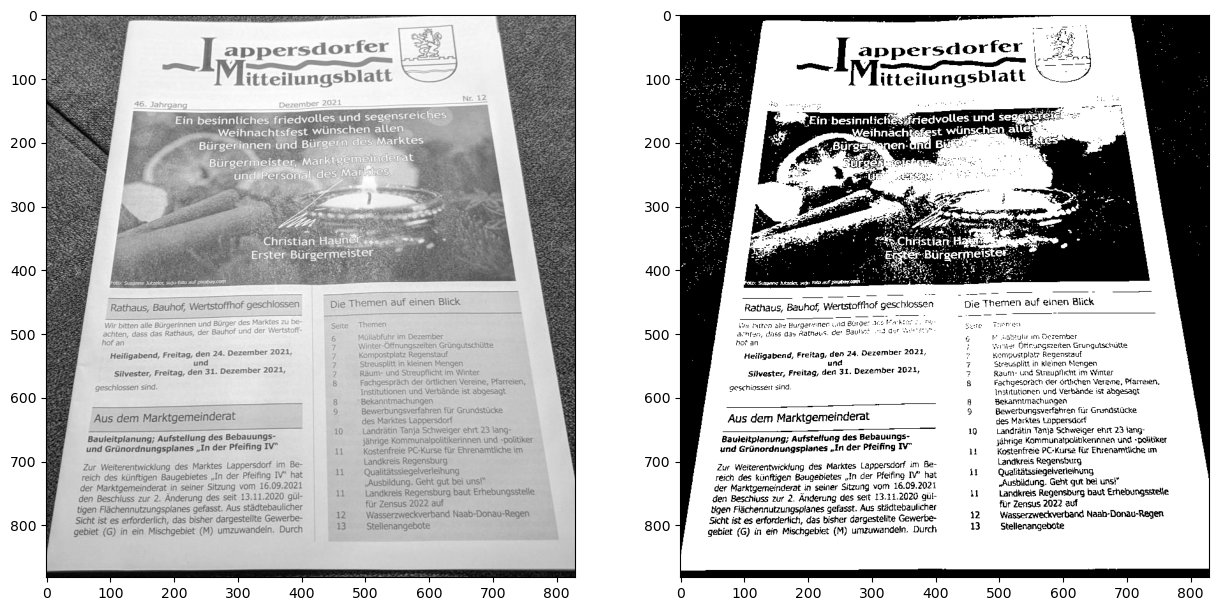

In [7]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img > opt_th, cmap='gray')
plt.show()

### Questions

* Looking at the computed histogram, could it be considered bimodal?
* Looking at the computed histogram, what binarization threshold would you chose? Why?
* Looking at the resulting (thresholded) image, is the text binarization (detection) good?

<font color="red">Q1) Дивлячись на обчислену гістограму, чи можна вважати її бімодальною?</font><br>
<font color="green">A1) В загальному випадку будь-що можна прийняти як бімодальне. Навіть одне тістечко можна поділити на дві частини, лише потрібний ніж. Але почуття вказують мені на те, що тут 4 кольори брати буде доречніше. Це враження є наслідком видимих чотирьох максимумів на гістограмі.</font><br>

<font color="red">Q2) Дивлячись на обчислену гістограму, який поріг бінаризації ви б вибрали? Чому?</font><br>
<font color="green">A2) "В сліпу", я прийняв би рішення "різати" пікселі за яскравістю 175. Це відокремить два максимуми ліворуч та два максимуми праворуч. (Той максимум на початку замалий, я його ігнорую.)</font><br>

<font color="red">Q3) Дивлячись на отримане (з пороговим значенням) зображення, чи хороша бінаризація (виявлення) тексту?</font><br>
<font color="green">A3) Як не дивно, більшість тексту можна прочитати. Проте, я маю бажання обробити це зображення частинами. Спроба нижче:</font><br>
<font color="blue">P.S. Результат трохи кращий ніж було, але гірший, ніж я сподівався. Треба шукати адаптивне відсікання з пошуком оптимальної зони усереднення.</font><br>
<br><br>
<font color="blue">_Google translate_</font><br>
<font color="green">A1) In general, anything can be accepted as bimodal. Even one cake can be divided into two parts, you only need a knife. But my feelings tell me that it would be more appropriate to take 4 colors here. This impression is a consequence of the visible four maxima on the histogram.</font><br>

<font color="green">A2) "Blindly", I would decide to "cut" the pixels at a brightness of 175. This would separate the two maxima on the left and the two maxima on the right. (That maximum at the beginning is too small, I ignore it.)</font><br>

<font color="green">A3) Surprisingly, most of the text is readable. However, I have a desire to process this image in parts. Try below:</font><br>
<font color="blue">P.S. The result is a little better than it was, but worse than I hoped. We need to look for adaptive clipping with the search for the optimal averaging zone.</font><br>

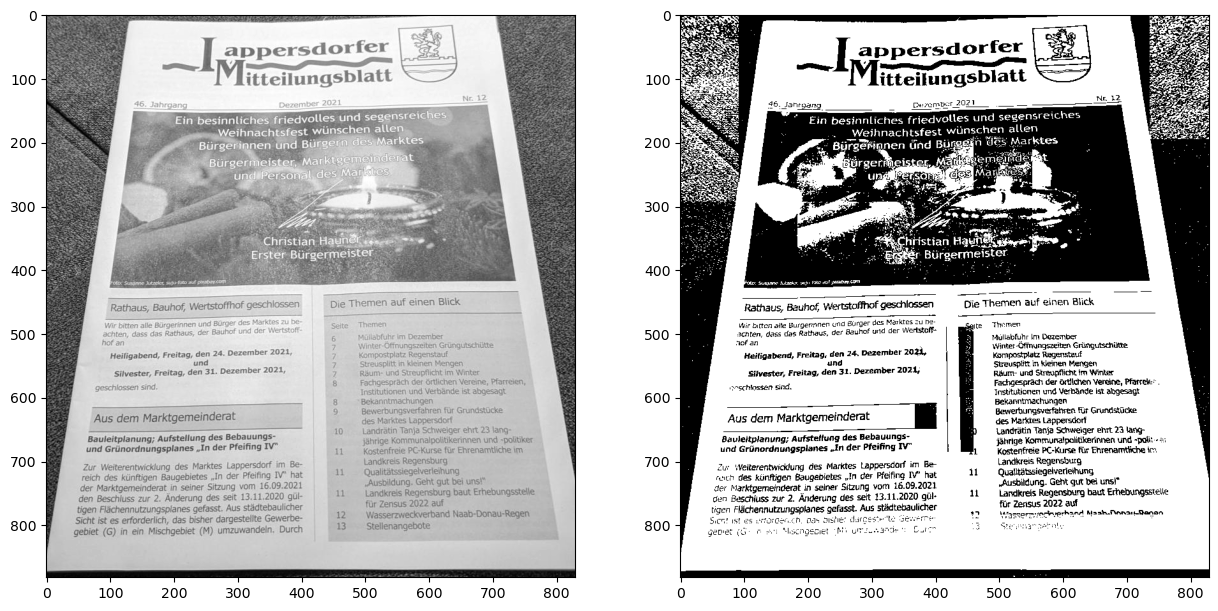

In [22]:
rows_d = 9
cols_d = 9

dst = np.zeros(shape=img.shape, dtype=np.uint8)

for xd in range(cols_d):
    for yd in range(rows_d):
        left = (cols*xd)//cols_d
        right = (cols*(xd+1))//cols_d
        top = (rows*yd)//rows_d
        bottom = (rows*(yd+1))//rows_d
        ret, ots_img = cv2.threshold(src=img[top:bottom, left:right], thresh=0, maxval=255, type=cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        dst[top:bottom, left:right] = ots_img

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(dst, cmap='gray')
plt.show()